# Preliminary Exploration

This notebook serves to showcase the big picture information about Netflix's content catalog.

## Imports and Data Preview

In [1]:
# import
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud, STOPWORDS


import little_mallet_wrapper
from pathlib import Path

In [2]:
# import datasets
titles_rating = pd.read_csv("/Users/huongngo/Desktop/PERSONAL PROJECTS/streaming_analysis/data/processed/netflix_rating.csv")
shows_rating = pd.read_csv("/Users/huongngo/Desktop/PERSONAL PROJECTS/streaming_analysis/data/processed/netflix_shows_rating.csv")
films_rating = pd.read_csv("/Users/huongngo/Desktop/PERSONAL PROJECTS/streaming_analysis/data/processed/netflix_films_rating.csv")

In [3]:
# glimpse at datasets
print(len(shows_rating))
shows_rating.head()

2676


,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,...,description,seasons,titleId,averageRating,numVotes,cast_genders,cast_majority,cast_ratio,director_genders,director_majority
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",9,2021,2021,...,"After crossing paths at a party, a Cape Town t...",2.0,NaN,NaN,NaN,"['female', 'female', 'female', 'male', 'male',...",female,0.526316,NaN,none
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",9,2021,2021,...,To protect his family from a powerful drug lor...,1.0,tt1159219,7.2,11.0,"['male', 'female', 'male', 'female', 'female',...",male,0.333333,['male'],male
2,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",9,2021,2021,...,"Feuds, flirtations and toilet talk go down amo...",1.0,tt15320436,6.7,221.0,NaN,none,0.000000,NaN,none
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",9,2021,2021,...,In a city of coaching centers known to train I...,2.0,tt9432978,9.1,69672.0,"['male', 'male', 'male', 'male', 'female', 'un...",male,0.250000,NaN,none
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",9,2021,2021,...,The arrival of a charismatic young priest brin...,1.0,NaN,NaN,NaN,"['female', 'male', 'male', 'male', 'female', '...",male,0.437500,['male'],male


In [4]:
columns_s = list(shows_rating.columns)
print(columns_s)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'month_added', 'year_added', 'release_year', 'rating', 'length', 'listed_in', 'description', 'seasons', 'titleId', 'averageRating', 'numVotes', 'cast_genders', 'cast_majority', 'cast_ratio', 'director_genders', 'director_majority']


In [5]:
# glimpse at datasets
print(len(films_rating))
films_rating.head()

6131


,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,...,listed_in,description,titleId,averageRating,numVotes,cast_genders,cast_majority,cast_ratio,director_genders,director_majority
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",9,2021,2020,...,Documentaries,"As her father nears the end of his life, filmm...",tt11394180,7.4,6543.0,NaN,none,0.000000,['female'],female
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",9,2021,2021,...,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,tt10101702,6.8,3664.0,"['female', 'female', 'male', 'female', 'female...",female,0.600000,"['male', 'male']",male
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",9,2021,1993,...,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",tt0108041,7.0,698.0,"['male', 'female', 'female', 'male', 'male', '...",male,0.375000,['male'],male
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",9,2021,2021,...,"Comedies, Dramas",A woman adjusting to life after a loss contend...,tt5164438,6.3,12681.0,"['female', 'unknown', 'male', 'male', 'male', ...",female,0.454545,['male'],male
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",9,2021,2021,...,"Dramas, International Movies",After most of her family is murdered in a terr...,tt9205538,5.5,1129.0,"['female', 'male', 'male', 'male', 'female', '...",male,0.454545,['male'],male


In [6]:
columns_f = list(films_rating.columns)
print(columns_f)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'month_added', 'year_added', 'release_year', 'rating', 'length', 'listed_in', 'description', 'titleId', 'averageRating', 'numVotes', 'cast_genders', 'cast_majority', 'cast_ratio', 'director_genders', 'director_majority']


In [7]:
str_columns = ['title', 'director', 'cast', 'country', 'date_added', 'rating', 'listed_in', 'description']
for column in str_columns:
    shows_rating[column] = shows_rating[column].fillna("")
    films_rating[column] = films_rating[column].fillna("")

num_columns_f = ['length', 'averageRating', 'numVotes']
num_columns_s = ['seasons', 'averageRating', 'numVotes']
for column in num_columns_s:
    shows_rating[column] = shows_rating[column].fillna(0)

for column in num_columns_f:
    films_rating[column] = films_rating[column].fillna(0)

In [8]:
# function to get unique values of a column
def getUnique(data):
    unique_values = set()
    for value in data:
        if value == "":
            unique_values.add(None)
        else:
            values = value.split(", ")
            for i in values:
                unique_values.add(i)
    return list(unique_values)

In [9]:
# function get count of a unique value that is part of a column that needs to be parsed
def getCount(data, token):
    count = 0
    for value in data:
        if value != "":
            values = value.split(", ")
            if token in values:
                count += 1
    return count

## Overview Analysis

In [10]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

### Columns of Interest:
- Director
- Cast
- Country
- Year Added
- Rating
- Genre (listed_in)
- Description
- Average Rating
- Number of Votes
- Majority Gender Representation in Cast
- Cast Ratio (Female to Others)
- Majority Gender Representation in Directors (for a single film) (i.e A film can have multiple directors)

### Director

In [11]:
# directors for SHOWS
unique_directors_s = getUnique(shows_rating['director'])
directors_dict_s = dict.fromkeys(unique_directors_s, 0)
for director in unique_directors_s:
    count_s = getCount(shows_rating['director'], director)
    directors_dict_s[director] = count_s

directors_df_s = pd.DataFrame({"director": directors_dict_s.keys(), "count": directors_dict_s.values()})
directors_df_s = directors_df_s.sort_values(by=['count'], ascending = False)
directors_df_s.head(5)

,director,count
299,Ken Burns,3
279,Alastair Fothergill,3
88,Joe Berlinger,2
46,Jung-ah Im,2
253,Stan Lathan,2


In [12]:
# directors for FILMS
unique_directors_f = getUnique(films_rating['director'])
directors_dict_f = dict.fromkeys(unique_directors_f, 0)
for director in unique_directors_f:
    count_f = getCount(films_rating['director'], director)
    directors_dict_f[director] = count_f

directors_df_f = pd.DataFrame({"director": directors_dict_f.keys(), "count": directors_dict_f.values()})
directors_df_f = directors_df_f.sort_values(by=['count'], ascending = False)
directors_df_f.head(5)

,director,count
1054,Rajiv Chilaka,22
3202,Jan Suter,21
4114,Raúl Campos,19
1719,Suhas Kadav,16
1897,Marcus Raboy,15


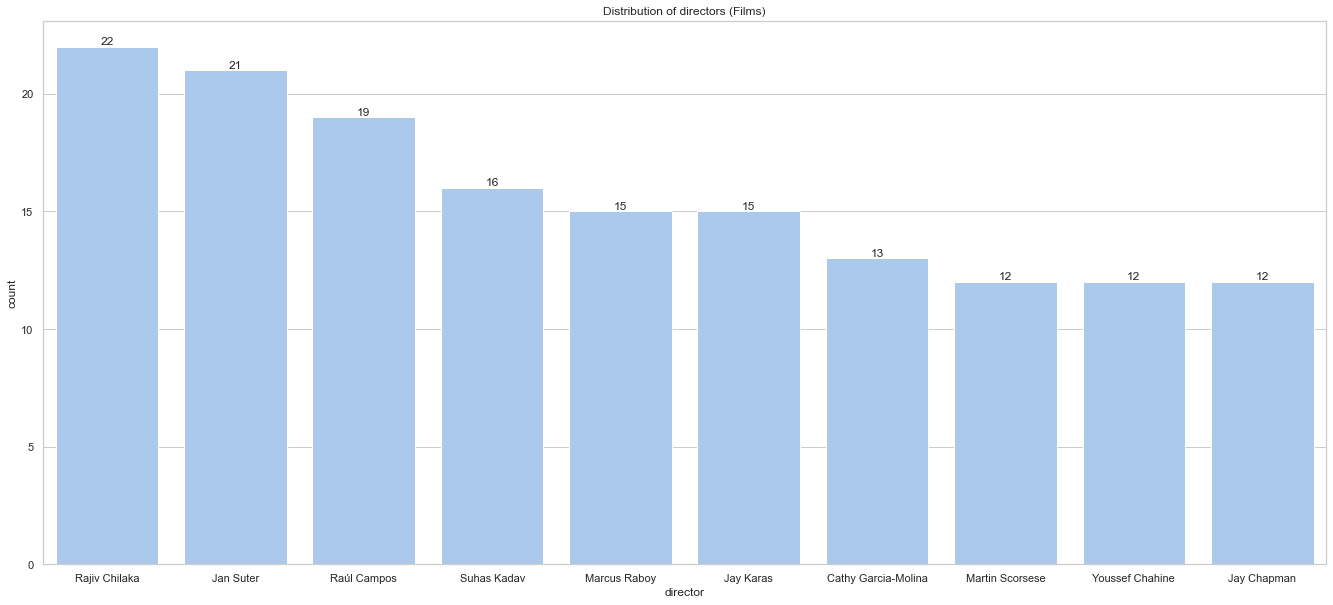

In [13]:
fig, ax = plt.subplots(figsize = (23, 10))
directors_plt_f = sns.barplot(x = 'director', y = 'count', data = directors_df_f.head(10), color = "b")
directors_plt_f.set_title("Distribution of directors (Films)")
for i in ax.containers:
    ax.bar_label(i,)

For both films and TV shows, the top 5 most credited directors on Netflix are male.

### Cast

In [14]:
# actors for SHOWS
unique_actors_s = getUnique(shows_rating['cast'])
actors_dict_s = dict.fromkeys(unique_actors_s, 0)
for actor in unique_actors_s:
    count_s = getCount(shows_rating['cast'], actor)
    actors_dict_s[actor] = count_s

actors_df_s = pd.DataFrame({"actor": actors_dict_s.keys(), "count": actors_dict_s.values()})
actors_df_s = actors_df_s.sort_values(by=['count'], ascending = False)
actors_df_s.head(10)

,actor,count
5238,Takahiro Sakurai,25
5427,Yuki Kaji,19
8274,Daisuke Ono,17
2734,Junichi Suwabe,17
969,Ai Kayano,17
14403,Yuichi Nakamura,16
10597,Yoshimasa Hosoya,15
11031,Jun Fukuyama,15
9571,David Attenborough,14
4704,Hiroshi Kamiya,13


In [15]:
# actors for SHOWS
unique_actors_f = getUnique(films_rating['cast'])
actors_dict_f = dict.fromkeys(unique_actors_f, 0)
for actor in unique_actors_f:
    count_f = getCount(films_rating['cast'], actor)
    actors_dict_f[actor] = count_f

actors_df_f = pd.DataFrame({"actor": actors_dict_f.keys(), "count": actors_dict_f.values()})
actors_df_f = actors_df_f.sort_values(by=['count'], ascending = False)
actors_df_f.head(10)

,actor,count
15981,Anupam Kher,42
10221,Shah Rukh Khan,35
24133,Naseeruddin Shah,32
3213,Om Puri,30
3918,Akshay Kumar,30
11030,Julie Tejwani,28
12533,Paresh Rawal,28
9213,Amitabh Bachchan,28
2561,Boman Irani,27
24813,Rupa Bhimani,27


For both films and shows, only 2 out of the top 10 most credited actors are female. All top 10 actors for films are Japanese voice actors. All top 10 actors for shows are Indian, and the 2 females are voice actresses. All other actors on the shows list are not voice actors. 

### Country

In [16]:
# SHOWS countries
unique_country_s = getUnique(shows_rating['country'])
country_dict_s = dict.fromkeys(unique_country_s, 0)
for country in unique_country_s:
    count_s = getCount(shows_rating['country'], country)
    country_dict_s[country] = count_s

country_df_s = pd.DataFrame({"country": country_dict_s.keys(), "count": country_dict_s.values()})
country_df_s = country_df_s.sort_values(by=['count'], ascending = False)
country_df_s.head(10)

,country,count
41,United States,938
25,United Kingdom,272
14,Japan,199
40,South Korea,170
26,Canada,126
36,France,90
39,India,84
3,Taiwan,70
55,Australia,66
49,Spain,61


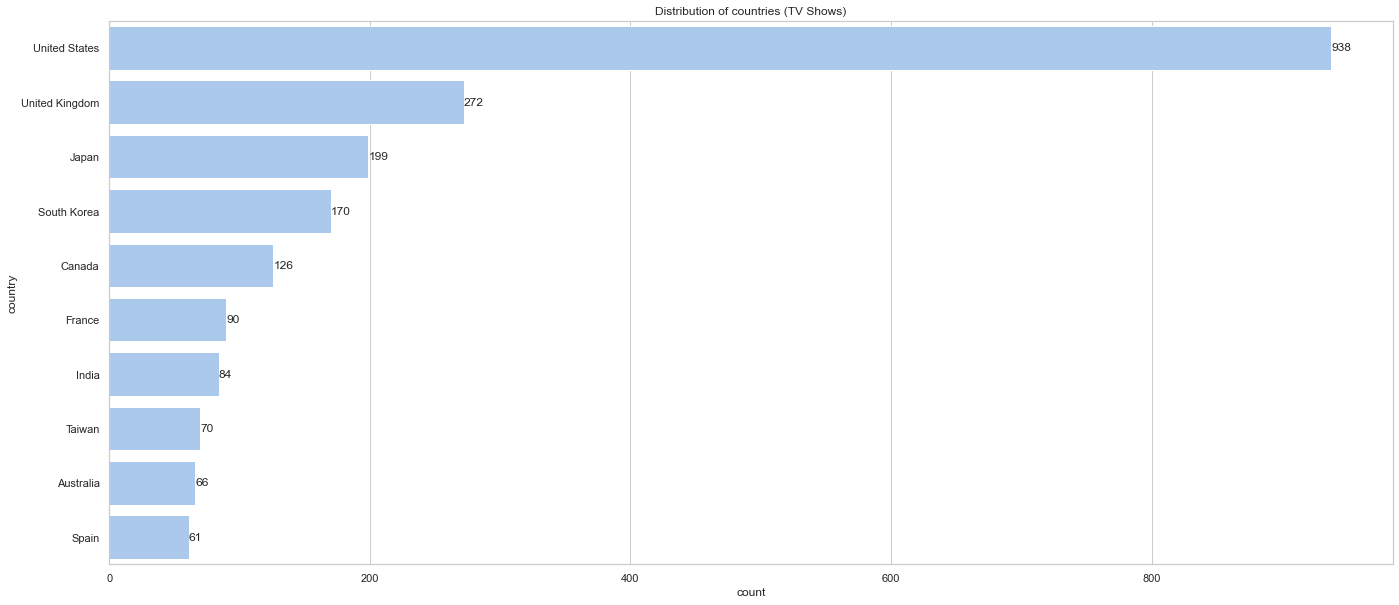

In [17]:
fig, ax = plt.subplots(figsize = (23, 10))
country_plt_s = sns.barplot(x = 'count', y = 'country', data = country_df_s.head(10), color = "b")
country_plt_s.set_title("Distribution of countries (TV Shows)")
for i in ax.containers:
    ax.bar_label(i,)

The top 3 countries with the most shows content are the United States, United Kingdom and Japan.

In [18]:
# FILMS countries
unique_country_f = getUnique(films_rating['country'])
country_dict_f = dict.fromkeys(unique_country_f, 0)
for country in unique_country_f:
    count_f = getCount(films_rating['country'], country)
    country_dict_f[country] = count_f

country_df_f = pd.DataFrame({"country": country_dict_f.keys(), "count": country_dict_f.values()})
country_df_f = country_df_f.sort_values(by=['count'], ascending = False)
country_df_f.head(10)

,country,count
86,United States,2751
112,India,962
111,United Kingdom,532
14,Canada,319
53,France,303
22,Germany,182
27,Spain,171
43,Japan,119
104,China,114
95,Mexico,111


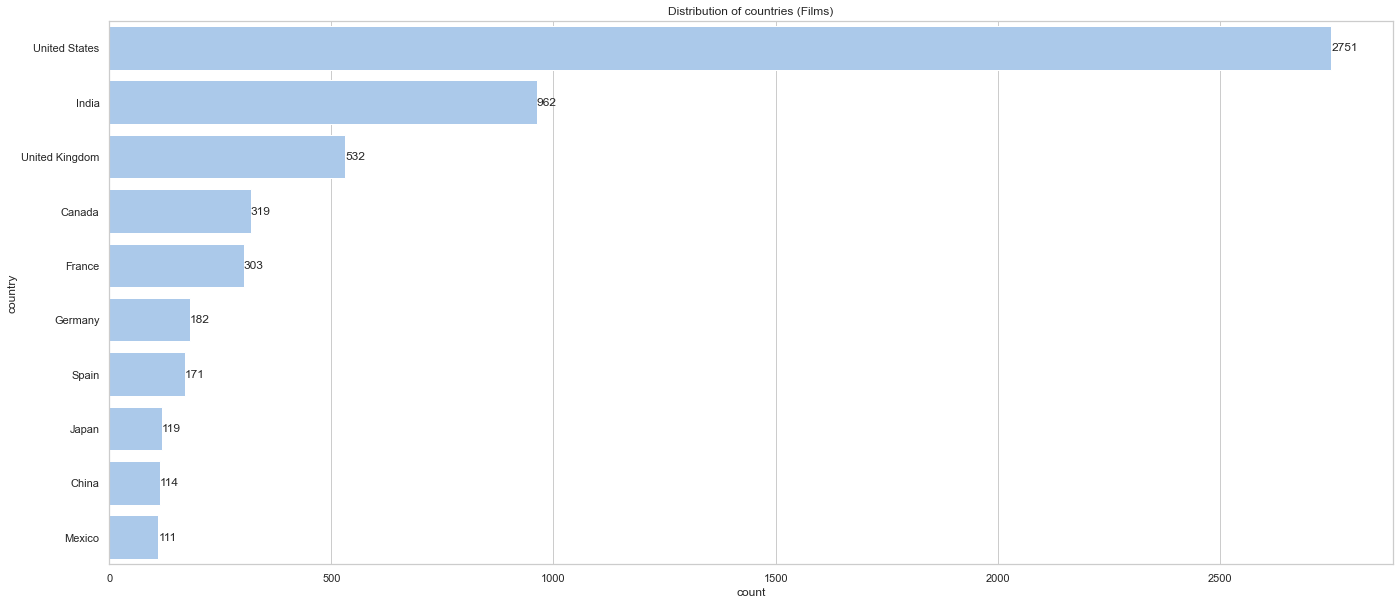

In [19]:
fig, ax = plt.subplots(figsize = (23, 10))
country_plt_f = sns.barplot(x = 'count', y = 'country', data = country_df_f.head(10), color = "b")
country_plt_f.set_title("Distribution of countries (Films)")
for i in ax.containers:
    ax.bar_label(i,)

The top 3 countries with the most content for films are the United States, India and the United Kingdom.

### Year Added

In [20]:
query = """
SELECT year_added, type, COUNT(*) AS count
FROM titles_rating
GROUP BY year_added, type
"""
year_added_by_type = sqldf(query)
year_added_by_type = year_added_by_type.drop([0])
year_added_by_type

,year_added,type,count
1,2008,Movie,1
2,2008,TV Show,1
3,2009,Movie,2
4,2010,Movie,1
5,2011,Movie,13
6,2012,Movie,3
7,2013,Movie,6
8,2013,TV Show,5
9,2014,Movie,19
10,2014,TV Show,5


(2014.0, 2021.0)

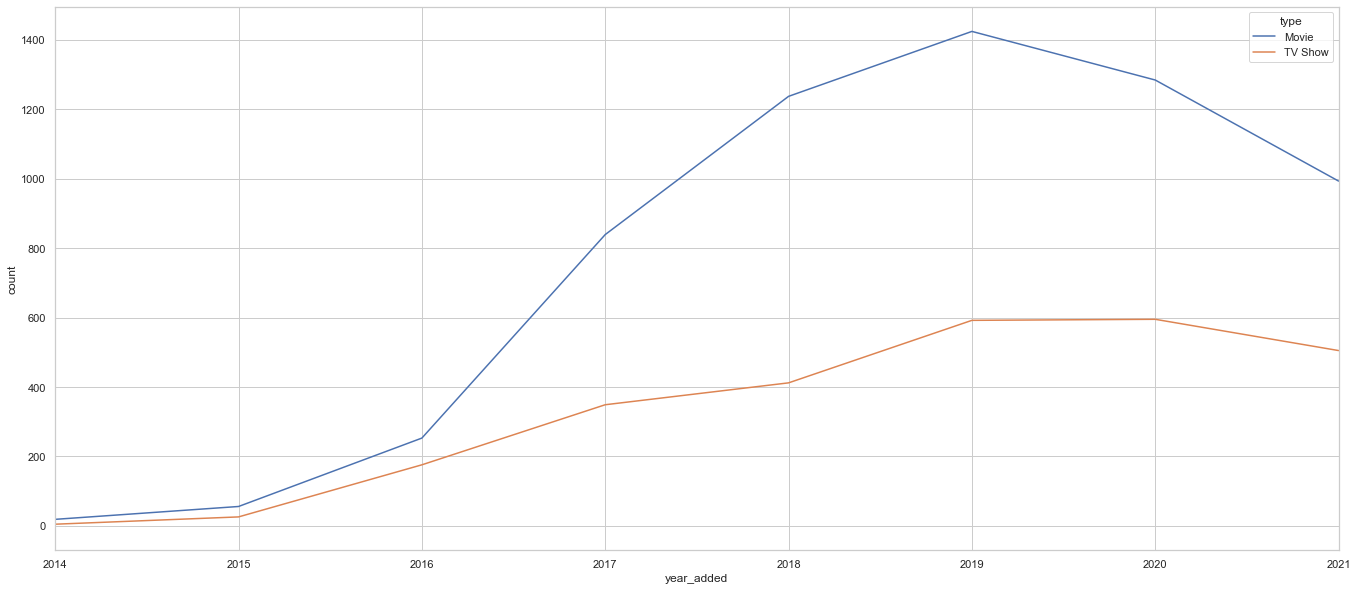

In [21]:
fig, ax = plt.subplots(figsize = (23, 10))
year_added_plt = sns.lineplot(x = 'year_added', y = 'count', hue = 'type', data = year_added_by_type)
year_added_plt.set_xlim(2014, 2021)

While Netflix has grown to become the most prominent streaming platform among the others, it started reducing importing and producing content from 2019 onwards. Before that, Netflix steadily grew from their establishment until 2016, when it started rapidly increasing the content on its platform, probably due to a huge shift to streaming in the entertainment industry. 

### Rating

In [22]:
query = """
SELECT type, rating, COUNT(*) AS count
FROM titles_rating
GROUP BY type, rating
"""
rating_by_type = sqldf(query)
rating_by_type = rating_by_type[rating_by_type['rating'] != ""]
rating_by_type

,type,rating,count
0,Movie,None,2
1,Movie,G,41
2,Movie,NC-17,3
3,Movie,NR,81
4,Movie,PG,287
5,Movie,PG-13,490
6,Movie,R,797
7,Movie,TV-14,1427
8,Movie,TV-G,126
9,Movie,TV-MA,2062


<AxesSubplot:xlabel='count', ylabel='rating'>

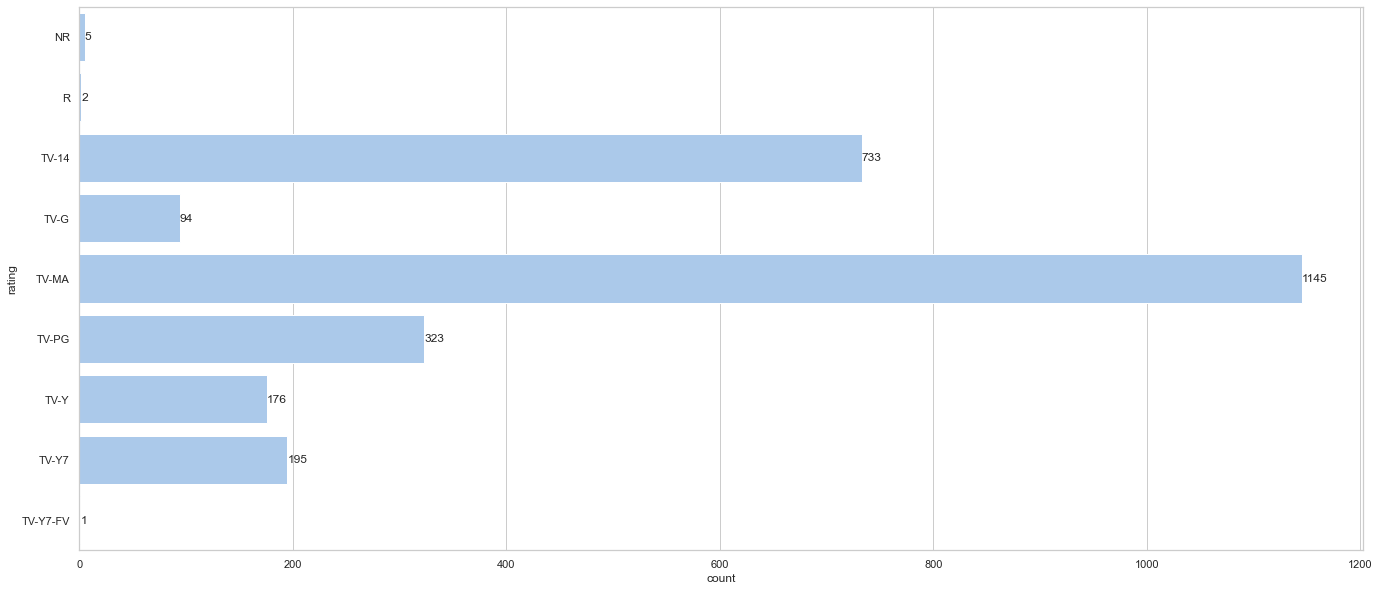

In [23]:
fig, ax = plt.subplots(figsize = (23, 10))
rating_plt_s = sns.barplot(x = 'count', y = 'rating', data = rating_by_type[rating_by_type['type'] == "TV Show"], color = "b")
for i in ax.containers:
    ax.bar_label(i,)
rating_plt_s

For shows, Netflix likes to import and product shows of the TV-MA, TV-14 and TV-PG ratings as their top 3 most frequent rating of shows. This is probably to appeal to their largest demographic, Millenials and Gen-Z's–those who actively partook in the shift to streaming. 

<AxesSubplot:xlabel='count', ylabel='rating'>

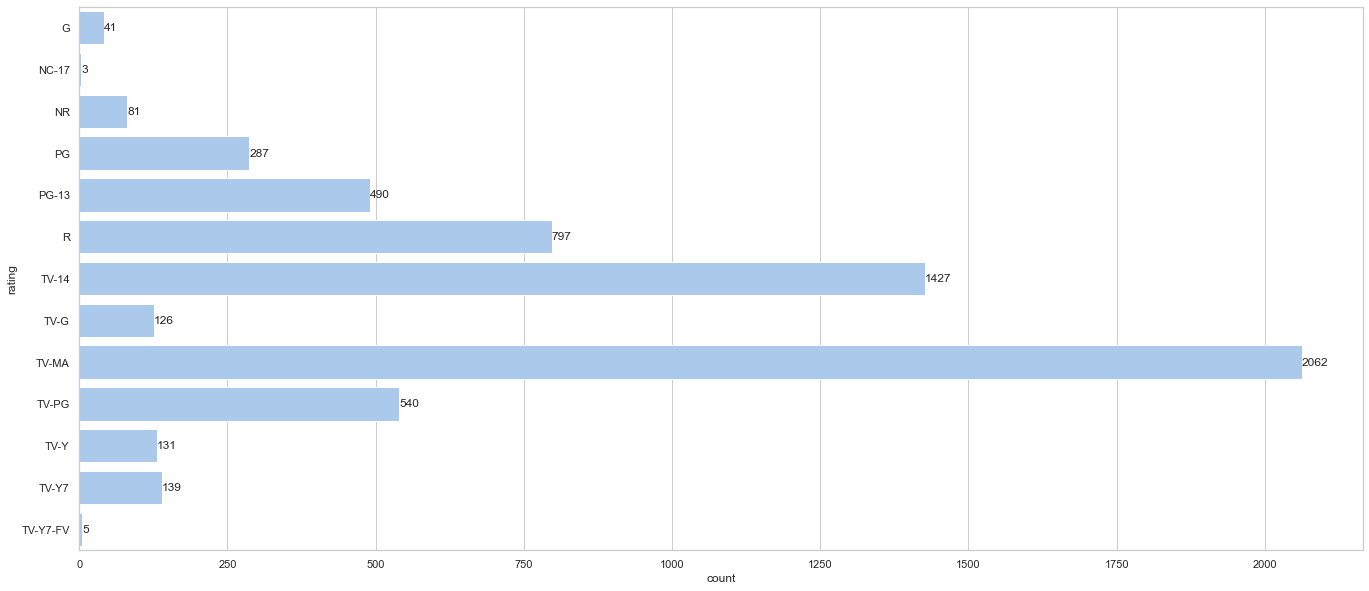

In [24]:
fig, ax = plt.subplots(figsize = (23, 10))
rating_plt_f = sns.barplot(x = 'count', y = 'rating', data = rating_by_type[rating_by_type['type'] == "Movie"], color = "b")
for i in ax.containers:
    ax.bar_label(i,)
rating_plt_f

Similar to shows, Netflix also likes to import and produce TV-MA and TV-14 shows. However, Netflix also likes to have R rated content as well. 

### Genre (listed_in)

In [25]:
# SHOWS countries
unique_genre_s = getUnique(shows_rating['listed_in'])
genre_dict_s = dict.fromkeys(unique_genre_s, 0)
for genre in unique_genre_s:
    count_s = getCount(shows_rating['listed_in'], genre)
    genre_dict_s[genre] = count_s

genre_df_s = pd.DataFrame({"genre": genre_dict_s.keys(), "count": genre_dict_s.values()})
genre_df_s = genre_df_s.sort_values(by=['count'], ascending = False)
genre_df_s.head(10)

,genre,count
4,International TV Shows,1351
20,TV Dramas,763
5,TV Comedies,581
9,Crime TV Shows,470
7,Kids' TV,451
14,Docuseries,395
10,Romantic TV Shows,370
16,Reality TV,255
19,British TV Shows,253
12,Anime Series,176


<AxesSubplot:xlabel='count', ylabel='genre'>

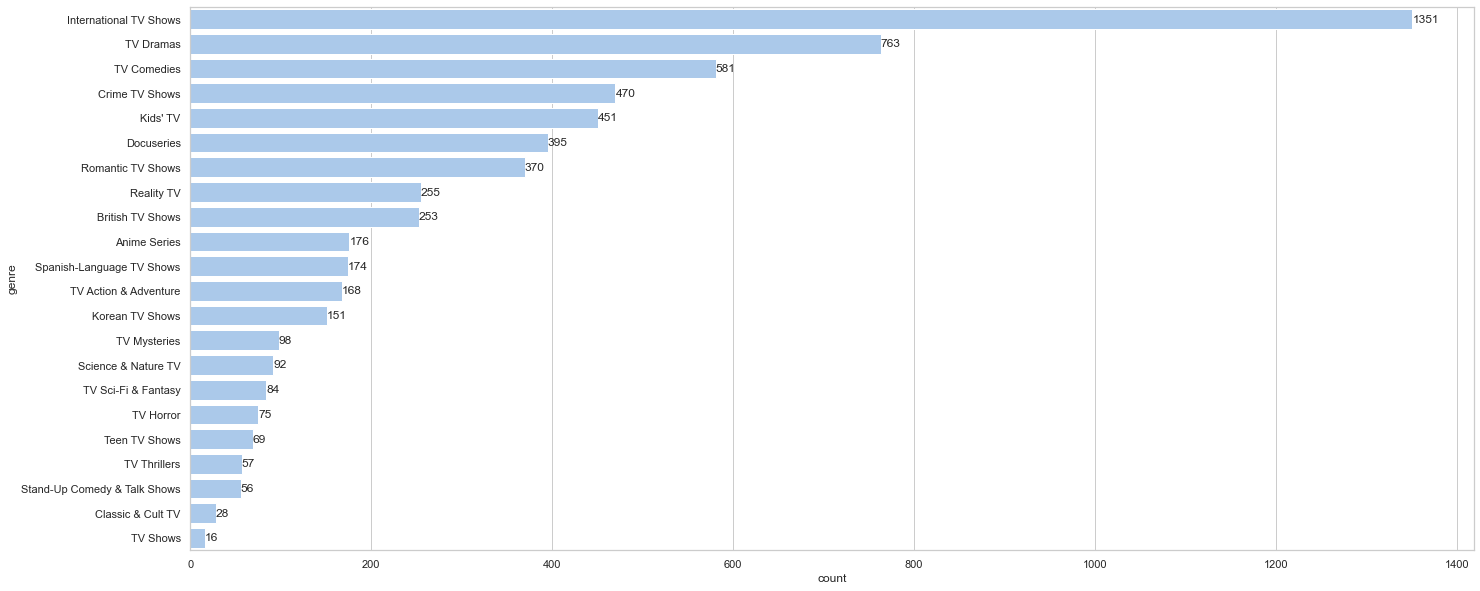

In [26]:
fig, ax = plt.subplots(figsize = (23, 10))
genre_plt_s = sns.barplot(x = 'count', y = 'genre', data = genre_df_s, color = "b")
for i in ax.containers:
    ax.bar_label(i,)
genre_plt_s

In [27]:
# FILMS countries
unique_genre_f = getUnique(films_rating['listed_in'])
genre_dict_f = dict.fromkeys(unique_genre_f, 0)
for genre in unique_genre_f:
    count_f = getCount(films_rating['listed_in'], genre)
    genre_dict_f[genre] = count_f

genre_df_f = pd.DataFrame({"genre": genre_dict_f.keys(), "count": genre_dict_f.values()})
genre_df_f = genre_df_f.sort_values(by=['count'], ascending = False)
genre_df_f.head(10)

,genre,count
1,International Movies,2752
6,Dramas,2427
13,Comedies,1674
16,Documentaries,869
19,Action & Adventure,859
18,Independent Movies,756
10,Children & Family Movies,641
15,Romantic Movies,616
3,Thrillers,577
11,Music & Musicals,375


<AxesSubplot:xlabel='count', ylabel='genre'>

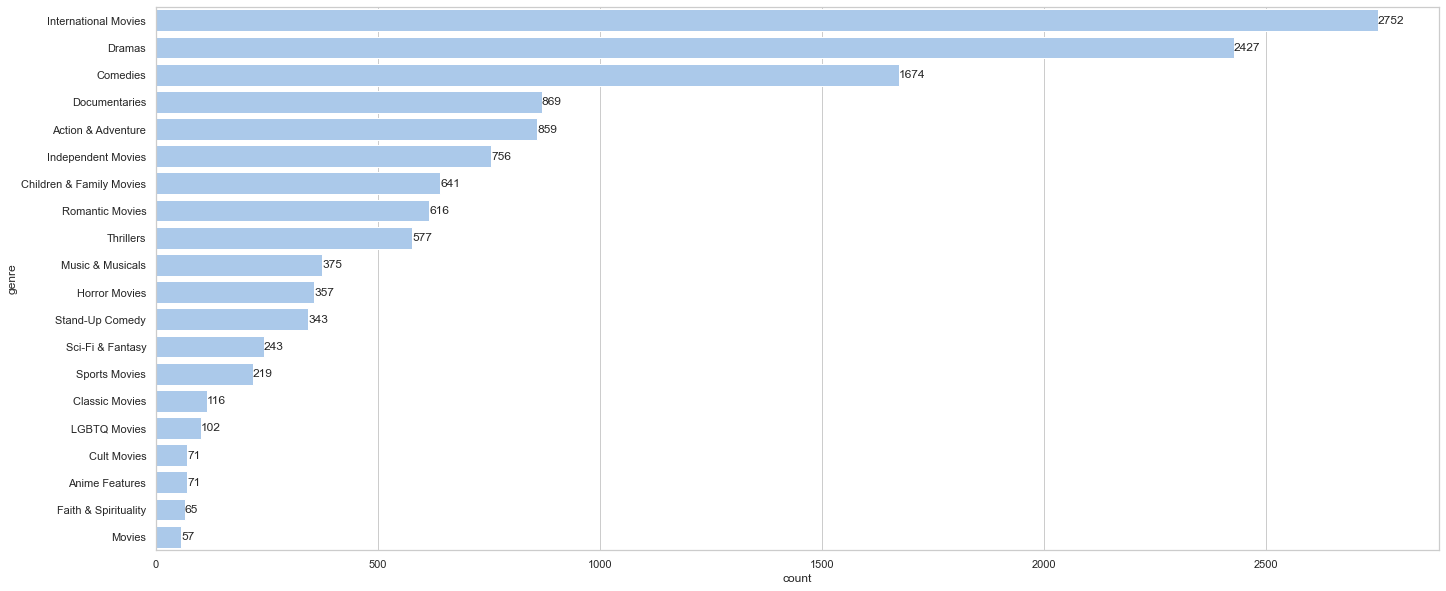

In [28]:
fig, ax = plt.subplots(figsize = (23, 10))
genre_plt_f = sns.barplot(x = 'count', y = 'genre', data = genre_df_f, color = "b")
for i in ax.containers:
    ax.bar_label(i,)
genre_plt_f

For both films and shows, foreign/international films and shows, dramas and comedies are the top 3 most popular genres on Netflix. 

### Average Rating + Number of Votes

In [29]:
shows_rating_no_0 = shows_rating[shows_rating['averageRating'] != 0]
shows_rating_no_0[['averageRating']].describe()

,averageRating
count,2094.000000
mean,6.866476
std,1.159898
min,1.800000
25%,6.200000
50%,7.000000
75%,7.700000
max,9.500000


<AxesSubplot:xlabel='averageRating', ylabel='Count'>

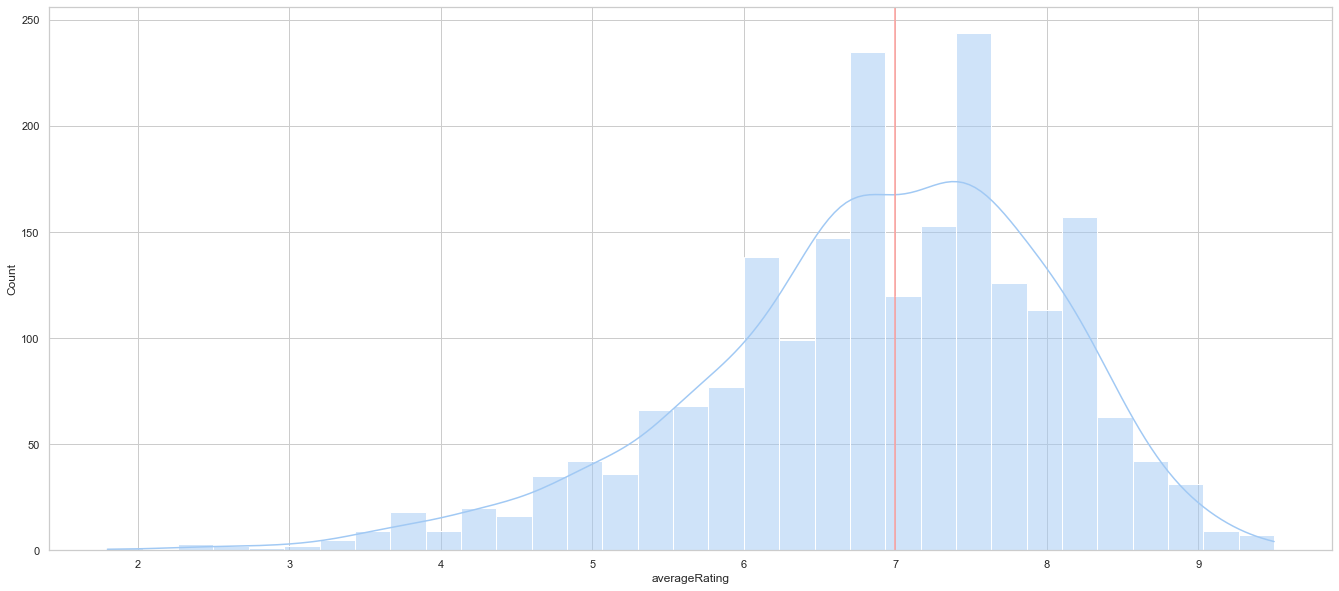

In [30]:
fig, ax = plt.subplots(figsize = (23, 10))
avg_rating_s_plt = sns.histplot(data = shows_rating_no_0, x = 'averageRating', color = "b", kde = True)
plt.axvline(x = 7, color = "r")
avg_rating_s_plt

Among all shows on Netflix (that have a rating on the IMDB database), the median average rating given to Netflix shows is 7. 

In [31]:
films_rating_no_0 = films_rating[films_rating['averageRating'] != 0]
films_rating_no_0[['averageRating']].describe()

,averageRating
count,4866.000000
mean,6.287341
std,1.177748
min,1.500000
25%,5.600000
50%,6.400000
75%,7.100000
max,9.600000


<AxesSubplot:xlabel='averageRating', ylabel='Count'>

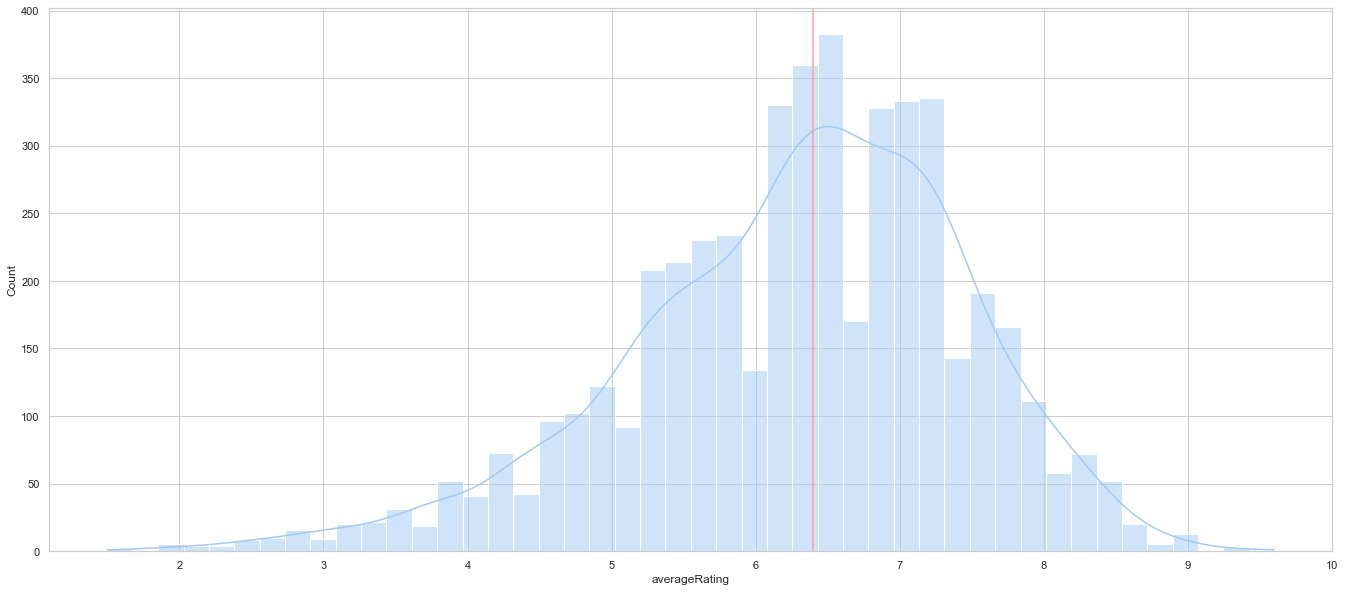

In [32]:
fig, ax = plt.subplots(figsize = (23, 10))
avg_rating_f_plt = sns.histplot(data = films_rating_no_0, x = 'averageRating', color = "b", kde = True)
plt.axvline(x = 6.4, color = "r")
avg_rating_f_plt

Among all shows on Netflix (that have a rating on the IMDB database), the median average rating given to Netflix's films is 6.4

### Description

In [33]:
nlp = spacy.load("en_core_web_sm")
pos_words = {}
for desc in titles_rating['description']:
    doc = nlp(desc)
    for token in doc:
        pos = token.pos_
        if pos not in pos_words.keys():
            pos_words[pos] = [token.lemma_]
        else:
            pos_words[pos].append(token.lemma_)

In [34]:
def plt_wc(words):
    fig, ax = plt.subplots(figsize = (10, 10))
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 5000, height = 5000, colormap = "RdPu").generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

for pos in pos_words:
    pos_words[pos] = " ".join(pos_words[pos])

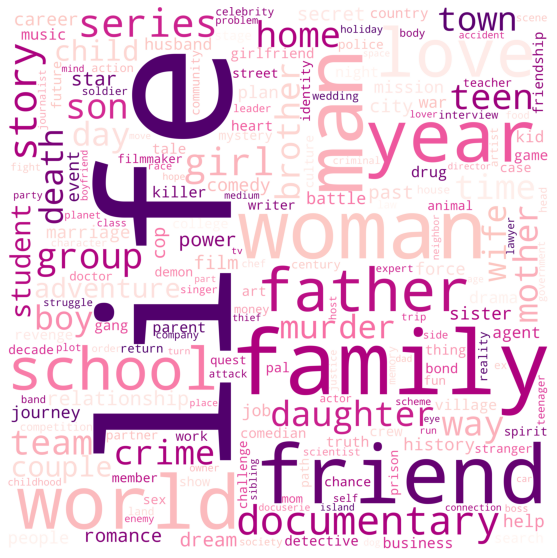

In [35]:
plt_wc(pos_words['NOUN'])

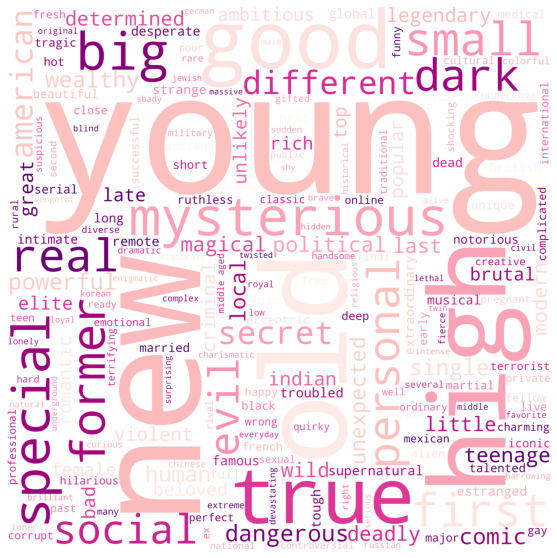

In [36]:
plt_wc(pos_words['ADJ'])

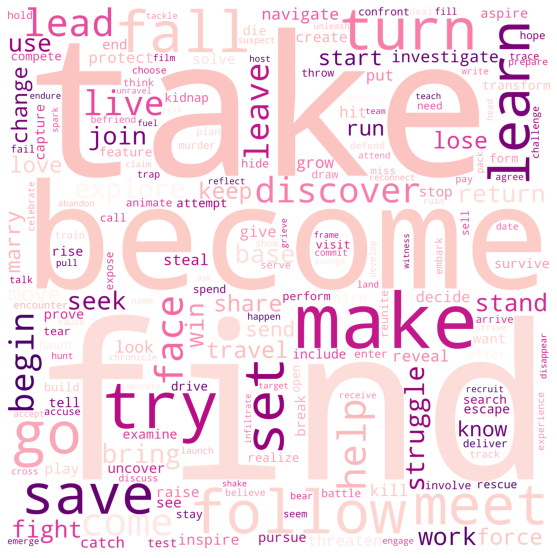

In [37]:
plt_wc(pos_words['VERB'])

In [38]:
path_to_mallet = '/Users/huongngo/mallet-2.0.8/bin/mallet'
output_directory_path = '/Users/huongngo/Desktop/PERSONAL PROJECTS/streaming_analysis/data'

In [39]:
training_data = []
for i, row in films_rating.iterrows():
    text = row['description']
    processed_text = little_mallet_wrapper.process_string(text, numbers = 'remove')
    training_data.append(processed_text)

In [40]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 6131
Mean Number of Words per Document: 14.5
Vocabulary Size: 15331


In [41]:
num_topics = 10
little_mallet_wrapper.quick_train_topic_model(path_to_mallet, output_directory_path, num_topics, training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 28
total tokens: 88640
<10> LL/token: -9.88844
<20> LL/token: -9.68023
<30> LL/token: -9.5939
<40> LL/token: -9.5482

0	0.5	two friends three school high trip must college night turns country road dreams home life job find gets years hit 
1	0.5	group new must police world save team day christmas war take first big time cop missing town secret small little 
2	0.5	father get man find back tries woman mission daughter must friend together soon young secret takes world agent earth mother 
3	0.5	war family gets women leads long learn search london city powerful life find take caught stars south new finds holiday 
4	0.5	young love woman new man girl finds falls old mother town life teen meets year mysterious school son brother student 
5	0.5	documentary special stand comedy comedian takes show world comic live stage sex band follows take behind history music one explores 
6	0.5	life new one crime becomes friend man

Complete


([['friends',
   'christmas',
   'new',
   'find',
   'get',
   'save',
   'best',
   'four',
   'wild',
   'way',
   'party',
   'plan',
   'summer',
   'three',
   'help',
   'holiday',
   'adventure',
   'day',
   'school',
   'home'],
  ['save',
   'must',
   'evil',
   'earth',
   'world',
   'fight',
   'battle',
   'rescue',
   'back',
   'human',
   'army',
   'bheem',
   'team',
   'planet',
   'power',
   'mission',
   'enemy',
   'stop',
   'alien',
   'group'],
  ['chef',
   'scientists',
   'vegas',
   'las',
   'future',
   'process',
   'male',
   'food',
   'around',
   'beauty',
   'across',
   'research',
   'children',
   'test',
   'investigates',
   'energy',
   'globe',
   'various',
   'exec',
   'brown'],
  ['war',
   'world',
   'south',
   'los',
   'angeles',
   'political',
   'india',
   'american',
   'african',
   'civil',
   'amid',
   'country',
   'social',
   'activist',
   'nazi',
   'women',
   'rights',
   'violence',
   'north',
   'jewish'],
  ['

In [42]:
path_to_topic_keys = '/Users/huongngo/Desktop/PERSONAL PROJECTS/streaming_analysis/data/mallet.topic_keys.10'
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for number, topic in enumerate(topics):
    print(f"✨Topic {number}✨\n\n{topic}\n")

✨Topic 0✨

['friends', 'christmas', 'new', 'find', 'get', 'save', 'best', 'four', 'wild', 'way', 'party', 'plan', 'summer', 'three', 'help', 'holiday', 'adventure', 'day', 'school', 'home']

✨Topic 1✨

['save', 'must', 'evil', 'earth', 'world', 'fight', 'battle', 'rescue', 'back', 'human', 'army', 'bheem', 'team', 'planet', 'power', 'mission', 'enemy', 'stop', 'alien', 'group']

✨Topic 2✨

['chef', 'scientists', 'vegas', 'las', 'future', 'process', 'male', 'food', 'around', 'beauty', 'across', 'research', 'children', 'test', 'investigates', 'energy', 'globe', 'various', 'exec', 'brown']

✨Topic 3✨

['war', 'world', 'south', 'los', 'angeles', 'political', 'india', 'american', 'african', 'civil', 'amid', 'country', 'social', 'activist', 'nazi', 'women', 'rights', 'violence', 'north', 'jewish']

✨Topic 4✨

['school', 'high', 'student', 'students', 'team', 'teen', 'competition', 'world', 'soccer', 'new', 'college', 'game', 'win', 'player', 'compete', 'gets', 'dancer', 'teacher', 'group', '